<a href="https://colab.research.google.com/github/ankit-verma2000/Projects/blob/main/YULU_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YULU : HYPOTHESIS TESTING**


# **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


**PROBLEM STATEMENT:**

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

In [ ]:
# Import all the ncessary library used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#  Data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
#Total number of elemnts this dataframe contains
df.size

130632

In [ ]:
# It shows the count of the no.of row and columns present in dataframe
df.shape

(10886, 12)

In [ ]:
# Dimension pf the datsframe
df.ndim

2

In [ ]:
# Top 5 rows of the dataframe
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Last 5 rows of the dataframe
df.tail()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# All the columns present in the dataframe
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Its gave the information about the basic statistics of variables or the descriptive statistics of the data(also known to be 5 number summary)
df.describe(include= 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Non - Graphical analysis: Value counts and unique attributes

In [ ]:
# unique values
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
# value counts
cat_column = ['season','weather','holiday','workingday']
(df[cat_column].melt().groupby(['variable', 'value'])[['value']].count()/ 10886) * 100

value
variable   value           
holiday    0      97.143120
           1       2.856880
season     1      24.673893
           2      25.105640
           3      25.105640
           4      25.114826
weather    1      66.066507
           2      26.033437
           3       7.890869
           4       0.009186
workingday 0      31.912548
           1      68.087452

In [ ]:
# Value counts
column = ['season','holiday','workingday','weather']
for col in column:
    value_cnt = df[col].value_counts(normalize = True) * 100
    print(f"--- VALUE COUNTS OF {col} COLUMNS ARE:--")
    print()
    print(value_cnt.round(2))
    print()

--- VALUE COUNTS OF season COLUMNS ARE:--

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

--- VALUE COUNTS OF holiday COLUMNS ARE:--

0    97.14
1     2.86
Name: holiday, dtype: float64

--- VALUE COUNTS OF workingday COLUMNS ARE:--

1    68.09
0    31.91
Name: workingday, dtype: float64

--- VALUE COUNTS OF weather COLUMNS ARE:--

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64



# Data Preprocessing

In [ ]:
# Handling missing values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Conclusion:
This data set does't consists of any missing value

In [ ]:
# Data type conversion
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
# Conversion of season col from numerical to categorical
def season_type(x):
  if x == 1:
    return 'spring'
  elif x == 2:
    return 'summer'
  elif x == 3:
    return 'fall'
  else:
    return 'winter'

In [ ]:
df['season'] = df['season'].apply(lambda x:season_type(x))
df['season']

0        spring
1        spring
2        spring
3        spring
4        spring
          ...  
10881    winter
10882    winter
10883    winter
10884    winter
10885    winter
Name: season, Length: 10886, dtype: object

In [ ]:
# Converting season,weather,holiday and working day columns into categorical type
cat_column = ['season','weather','holiday','workingday']
for col in column:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


# OUTLIER DETECTION:


UNIVARIATE ANALYSIS

In [ ]:
df[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
a = df.describe().T[['mean','50%']]
a['diff'] = a['mean'] - a['50%']
a

,mean,50%,diff
temp,20.230860,20.500,-0.269140
atemp,23.655084,24.240,-0.584916
humidity,61.886460,62.000,-0.113540
windspeed,12.799395,12.998,-0.198605
casual,36.021955,17.000,19.021955
registered,155.552177,118.000,37.552177
count,191.574132,145.000,46.574132


CONCLUSION:
From above dataframe we can observe that
- There no outliers in 'temp' and 'atemp' column.
- There are some observations in the 'humidity' and 'windspeed' columns that appear to be outliers.
- Outliers are noticeable in the casual ,registered users, count and in windspeed.

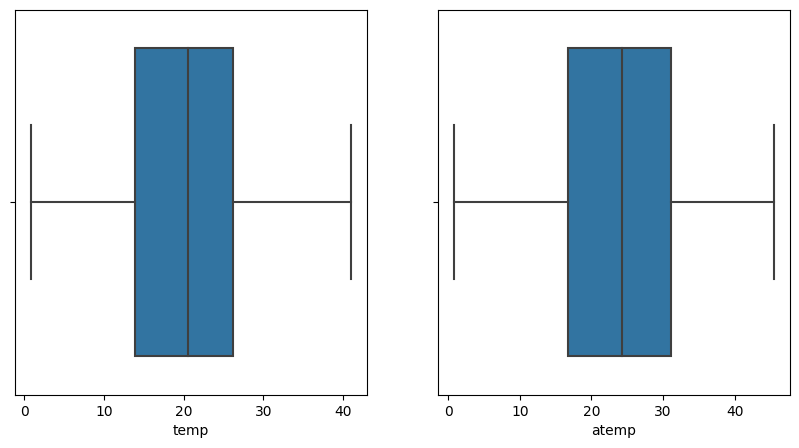

In [ ]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x='temp')

plt.subplot(1,2,2)
sns.boxplot(data = df, x ='atemp')

plt.show()

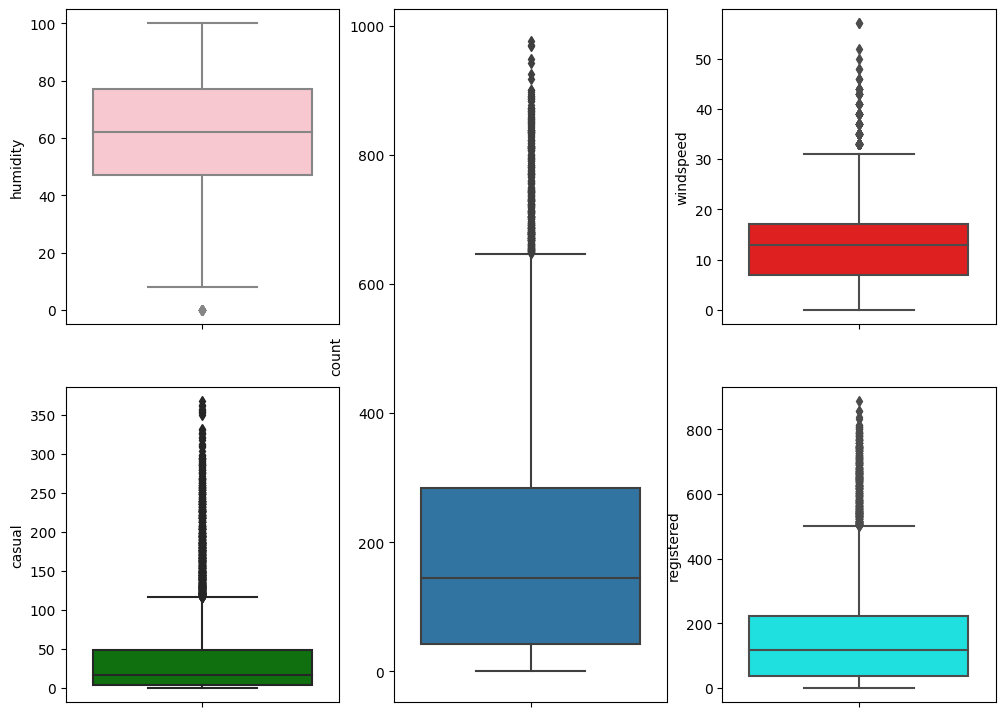

In [ ]:
plt.figure(figsize =(12,9))

plt.subplot(2,3,1)
sns.boxplot(data = df, y ='humidity',color='pink')

plt.subplot(2,3,3)
sns.boxplot(data = df, y ='windspeed',color='red')

plt.subplot(2,3,4)
sns.boxplot(data = df, y ='casual',color='green')

plt.subplot(2,3,6)
sns.boxplot(data = df, y ='registered',color='cyan')

plt.subplot(1,3,2)
sns.boxplot(data = df, y ='count')


plt.show()

# VISUAL AND NON VISUAL ANALYSIS:

Monthly tread for no. of average cycles rented

In [ ]:
month_df = df.groupby(df['datetime'].dt.month).agg(average_cycles_rented=('count','mean')).reset_index()
month_df

,datetime,average_cycles_rented
0,1,90.366516
1,2,110.003330
2,3,148.169811
3,4,184.160616
4,5,219.459430
5,6,242.031798
6,7,235.325658
7,8,234.118421
8,9,233.805281
9,10,227.699232


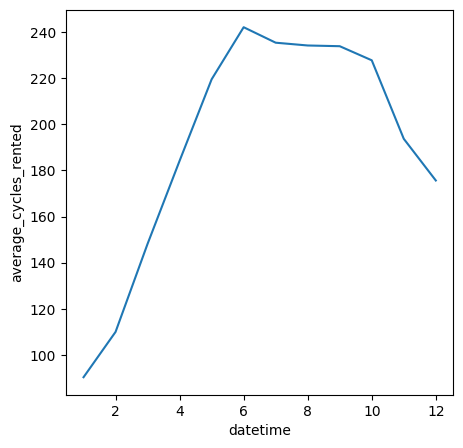

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(data = month_df,x = 'datetime',y = 'average_cycles_rented',markers=True)
plt.show()

CONCLUSION:

- The highest average hourly count of rental bikes occurs in June, July, and August, reflecting the peak demand during summer.
- Conversely, the lowest average hourly count of rental bikes is found in January, February, and March, which are the winter months with reduced cycling activity.
- Notably, there is an increasing trend in average bike rentals from February to June, corresponding to the shift from winter to spring and summer.
- Conversely, a decreasing trend in average bike rentals is observed from October to December due to the onset of winter.

Hourly Trends in Average Cycle Rentals

In [ ]:
hour_df=df.groupby(df['datetime'].dt.hour).agg(average_cycle_rented=('count','mean')).reset_index()
hour_df

,datetime,average_cycle_rented
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


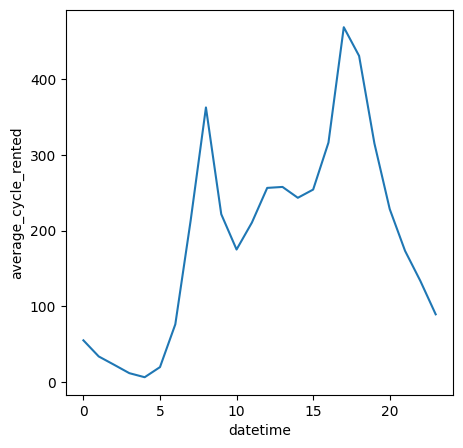

In [ ]:
plt.figure(figsize = (5,5))
sns.lineplot(data = hour_df,x = 'datetime',y = 'average_cycle_rented',markers=True)
plt.show()

CONCLSION:

- The highest average count of rental bikes is observed between 3 pm to 8 pm This indicates peak hours during the day when cycling is most popular.
- Conversely, the lowest average count of rental bikes occursbetween 12 to 5 am more precisely at 4 AM. These hours represent the early morning period with the least demand for cycling.
- Notably, there is an increasing trend in cycle rentals between 5 AM and 8 AM, suggesting a surge in demand during the early morning hours as people start their day.
- Additionally, there is a decreasing trend in cycle rentals from 5 PM to 11 PM, indicating a gradual decline in demand as the day progresses into the evening and nighttime.

Q - Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

In [ ]:
cat_column

['season', 'weather', 'holiday', 'workingday']

In [ ]:
season_df=df.groupby(['season']).agg(number_of_cycles_rented=('count','sum')).reset_index()
season_df

,season,number_of_cycles_rented
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


In [ ]:
label= season_df['season']
size= season_df['number_of_cycles_rented']

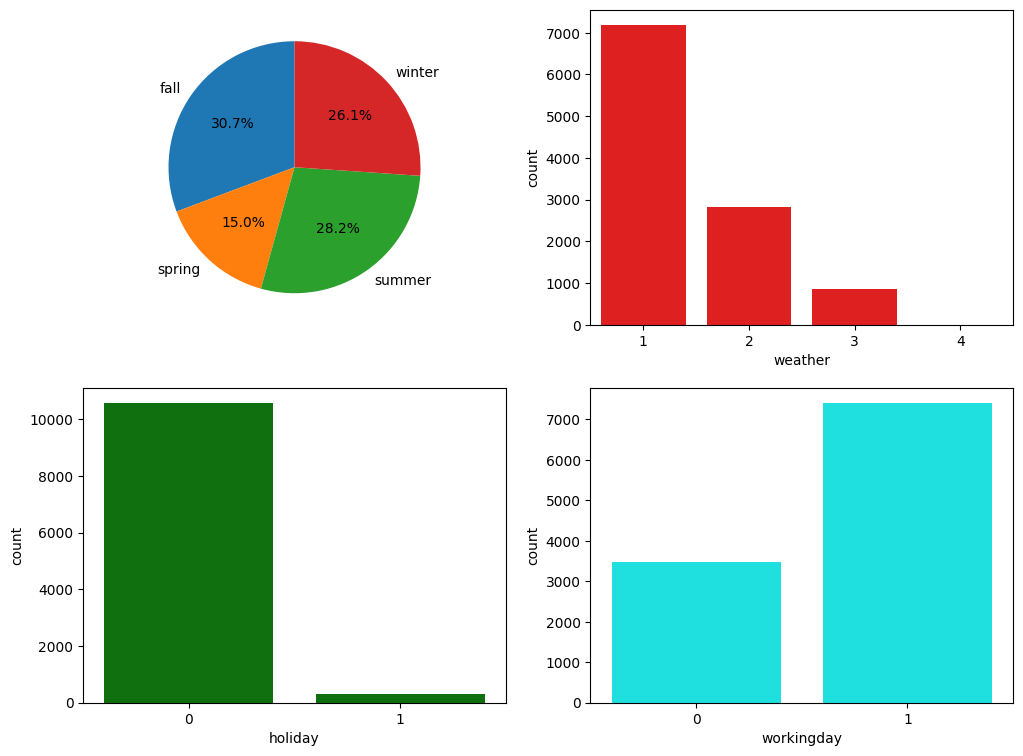

In [ ]:
plt.figure(figsize =(12,9))

plt.subplot(2,2,1)
plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)
#sns.barplot(data = df, x ='season',color='yellow')

plt.subplot(2,2,2)
sns.countplot(data = df, x ='weather',color='red')

plt.subplot(2,2,3)
sns.countplot(data = df, x ='holiday',color='green')

plt.subplot(2,2,4)
sns.countplot(data = df, x ='workingday',color='cyan')

plt.show()

CONCLUSION:
- season:
1. During the fall season, approximately 30.7% of cycles are rented.
2. In the summer season, around 28.2% of cycles are rented.
3. The winter season records a rental rate of about 26.1% for cycles.
4. The lowest rental rate, at just 15%, is observed in the spring season.

- weather:
1. In Weather condition 1 experiences the highest rental rate, with approximately 70.8% of cycles rented.
2. In weather condition 2, around 24.3% of cycles are rented.
3. Weather condition 3 has a rental rate of approximately 4.9% for cycles.
4. Weather condition 4 exhibits an exceptionally low rental rate, with only 0.00786% of cycles being rented.
- On working day most number of cycles rented as we compare from the non working day.

**BIVARIATE ANALYSIS**

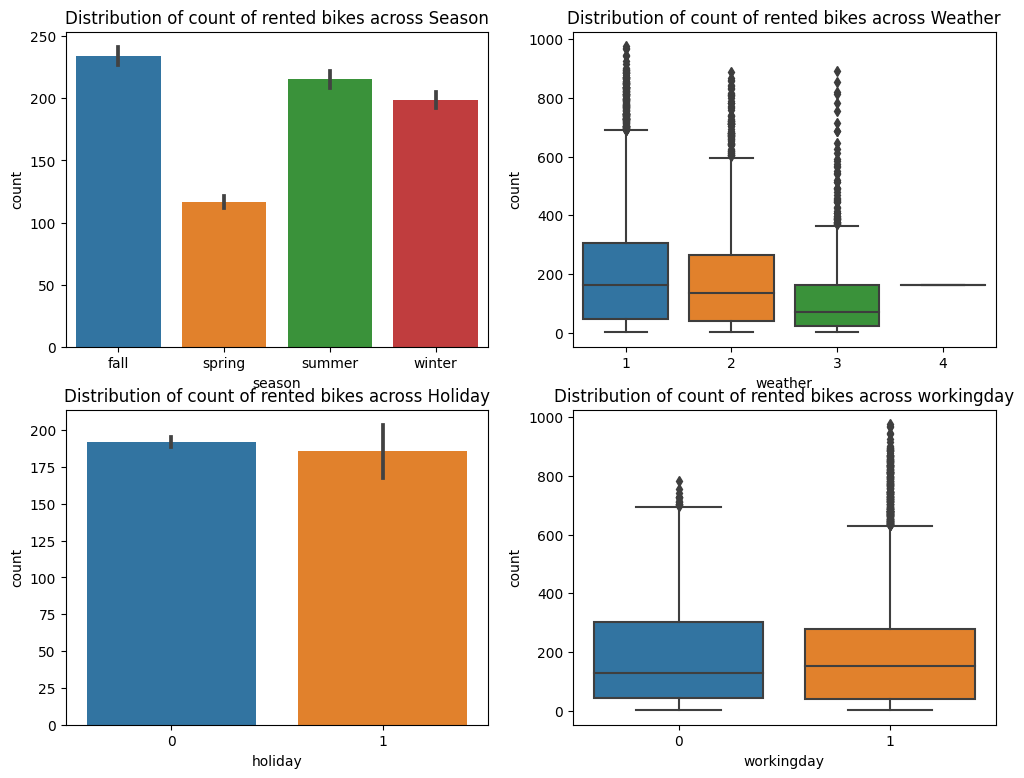

In [ ]:
# Plotting up of categorical variables against count using boxplots
plt.figure(figsize =(12,9))

plt.subplot(2,2,1)
sns.barplot(data = df, x ='season',y ='count').set_title('Distribution of count of rented bikes across Season')

plt.subplot(2,2,2)
sns.boxplot(data = df, x ='weather',y ='count').set_title('Distribution of count of rented bikes across Weather')

plt.subplot(2,2,3)
sns.barplot(data = df, x ='holiday',y ='count').set_title('Distribution of count of rented bikes across Holiday')

plt.subplot(2,2,4)
sns.boxplot(data = df, x ='workingday',y ='count').set_title('Distribution of count of rented bikes across workingday')

plt.show()

CONCLUSION:
- SEASON ANALYSIS: As compared to other seasons,In fall and summer seasons more bikes were rented.
WEATHER ANALYSIS : When there is 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) less bikes were rented.
- WEATHER ANALYSIS:
The probability of renting a bike during weather condition 1 appears to be higher than in other weather types.
- HOLIDAY ANALYSIS: Whenever its a holiday more bikes are rented.
- WORKING DAY ANALYSIS: Whenever when workingday is neither weekend nor holiday day is holiday or weekend, slightly more bikes were rented.



In [ ]:
# Plotting numerical variables against the count of total number of bikes rented  using scatterplot
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


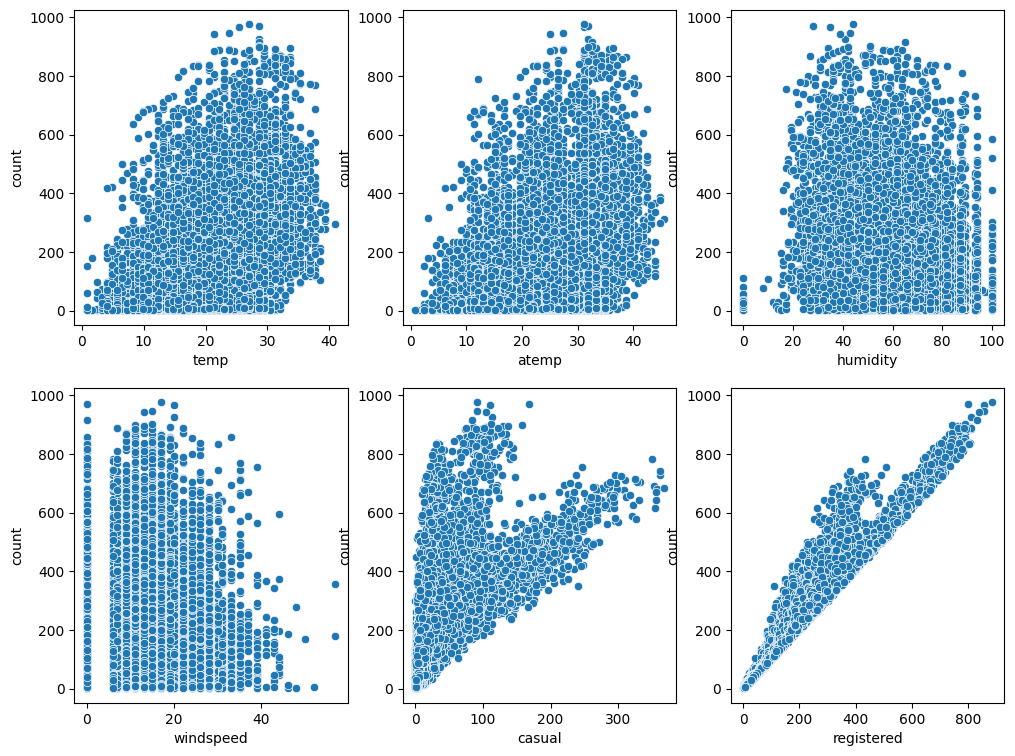

In [ ]:
plt.figure(figsize =(12,9))

plt.subplot(2,3,1)
sns.scatterplot(data = df, x ='temp',y ='count')

plt.subplot(2,3,2)
sns.scatterplot(data = df, x ='atemp',y ='count')

plt.subplot(2,3,3)
sns.scatterplot(data = df, x ='humidity',y ='count')

plt.subplot(2,3,4)
sns.scatterplot(data = df, x ='windspeed',y ='count')

plt.subplot(2,3,5)
sns.scatterplot(data = df, x ='casual',y ='count')

plt.subplot(2,3,6)
sns.scatterplot(data = df, x ='registered',y ='count')

plt.show()

**CONCLUSION:**

-  When the temperature is less than 10, number of bikes rented is less.
- When the humidity is less than 20, number of bikes rented is very very low.
- When the windspeed is greater than 35, number of bikes rented is less.

**MULTIVARIATE ANALYSIS**

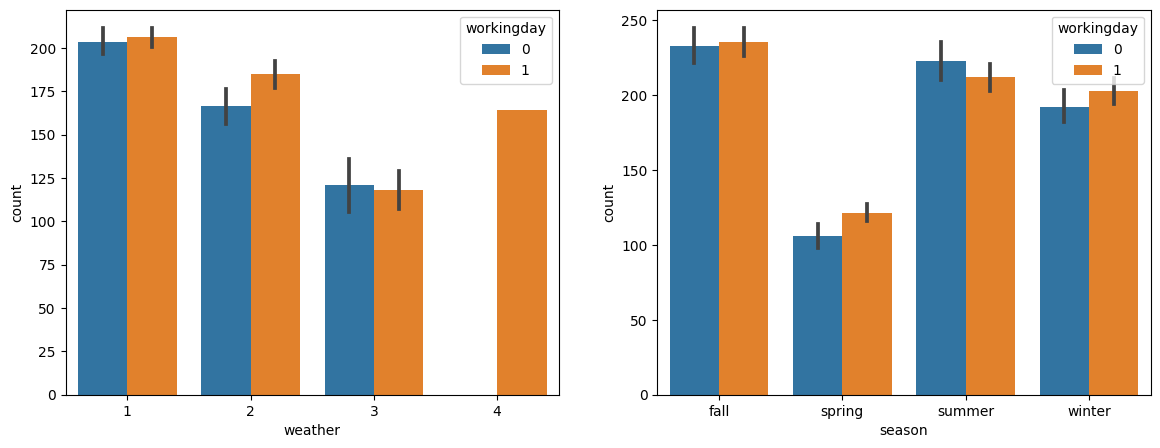

In [ ]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.barplot(data = df,x = 'weather',y='count',hue = 'workingday')

plt.subplot(1,2,2)
sns.barplot(data = df,x = 'season',y='count',hue = 'workingday')

plt.show()

CONCLUSION:
* WEATHER ANALYSIS:
1. In weather condition 1 (Clear, Few clouds, partly cloudy, partly cloudy) most amount of bikes were rented for both working and non working day. followed by weather condition 2 and 3.
2. But in weather condition 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) there were no bikes rented by the non working day in thhis weather but on this weather workinday it shows high number of bikes rented as compare to weather condition 3.
* SEASON ANALYSIS:
1. In fall season there were high number of bikes rented for working day and non workingday.
2. but in spring season in working day period very les bikes were rented in comparison to other seasons.

**HEATMAP AND CORRELATION**

<ipython-input-127-ff954797a3a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')


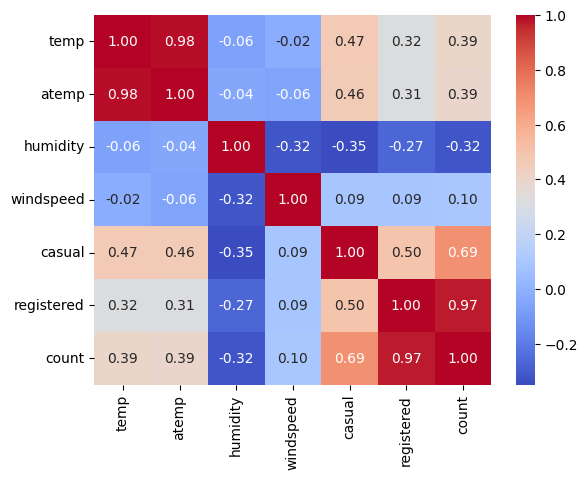

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

- The weak positive correlation of 0.39 between temperature and the number of bikes rented suggests that, on average, fewer people prefer to use electric cycles during the daytime between 12 PM to 3 PM. This observation aligns with our univariate analysis, where we discovered that the average number of cycles rented during this time frame was lower compared to other times of the day. A similar correlation pattern is also observed in the case of "feels-like" temperature, reinforcing this trend.
- The negative correlation between humidity and the number of cycles rented indicates that people tend to avoid using electric bikes during high humidity conditions. This avoidance can be attributed to the discomfort caused by the heavy and sticky air, leading to sweating and a general sense of unease. Moreover, the reduced efficiency of electric bikes in high humidity, resulting in increased air resistance and potential battery performance issues, contributes to the preference for alternative transportation or indoor activities in such conditions.
- The presence of a weak positive correlation between windspeed and the number of cycles rented indicates that there is a subset of individuals who appear to favor using electric cycles during windy conditions for the sheer enjoyment of the experience. While this preference contributes to a slight increase in bike rentals on windier days, it's essential to recognize that this effect is not particularly strong, as indicated by the weak correlation. This suggests that the enjoyment of cycling in windy conditions is a relatively niche preference among riders.

## HYPOTHESIS TESTING

##**Chi-square test to check if Weather is dependent on the season**

In [ ]:
# import necessary library for hypothesis test
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,tiecorrect
from scipy.stats import f,f_oneway
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro,kstest,norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot


In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS
# H0: WEATHER IS INDEPENDENT ON SEASON
# H1: WEATHER IS DEPENDENT ON SEASON

# Consider confidence level to be 95%
# alpha = 1 - confidence
alpha = 0.05

In [ ]:
ws_df = pd.crosstab(index = df['season'] ,columns = df['weather'])
ws_df

weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [ ]:
chi_stat, p_value, dof, expected_frq = chi2_contingency(ws_df)
print('Chi2 Test Statistics:',chi_stat)
print('P_Value:',p_value)
print('Degree of Freedom:',dof)
print('Expected Frequency:',expected_frq)
if p_value < alpha:
  print('INTERPRETATION: REJECT H0, SO WE CAN CONCLUDE THAT WEATHER IS DEPENDENT ON SEASON')
else:
  print('INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT WEATHER IS INDEPENDENT ON SEASON')

Chi2 Test Statistics: 49.15865559689363
P_Value: 1.5499250736864862e-07
Degree of Freedom: 9
Expected Frequency: [[1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
INTERPRETATION: REJECT H0, SO WE CAN CONCLUDE THAT WEATHER IS DEPENDENT ON SEASON


CHI2 TEST CONCLUSION:

* Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
* Indeed, this suggests that we have gathered enough evidence to conclude that there is a dependence between weather and the season.

##**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS
# H0: WORKING DAY HAS NO EFFECT ON THE NUMBER OF CYCLES RENTED
# H1: WORKING DAY HAS AN EFFECT ON THE NUMBER OF CYCLES RENTED

# Consider confidence level to be 95%
# alpha = 1 - confidence
alpha = 0.05

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


**Assumptions of a T Test**

- Independence : The observations in one sample are independent of the observations in the other sample.
- Normality : Both samples are approximately normally distributed.
- Homogenity of Variances : Both samples have approximately the same variance.
- Random Sampling : Both samples were obtained using random sampling method

In [ ]:
wrkday = df[df['workingday'] == 0]['count'].values
nwrkday = df[df['workingday'] == 1]['count'].values

In [ ]:
wrkday_sample = df[df['workingday'] == 0]['count'].sample(300)
nwrkday_sample = df[df['workingday'] == 1]['count'].sample(300)

**NORMALITY CHECK USING QQPLOT AND HISTOGRAM**

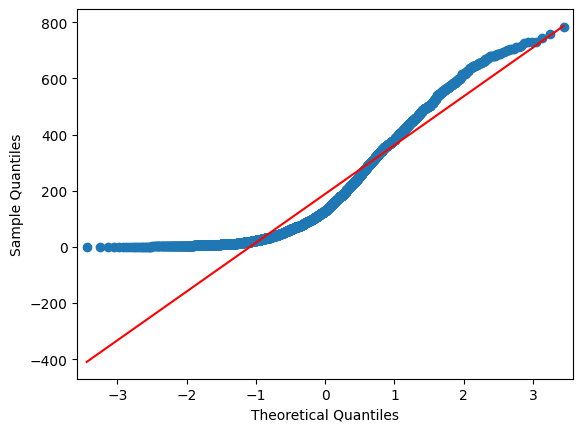

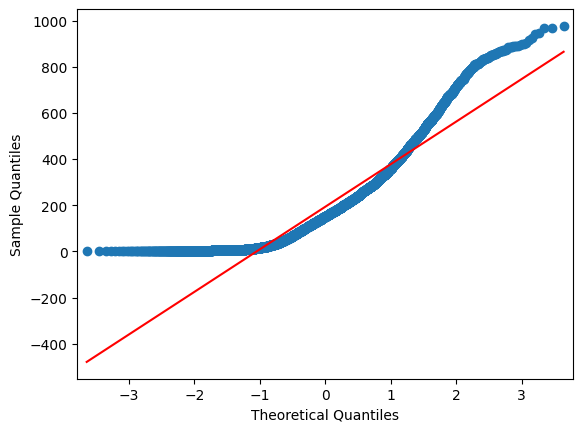

In [ ]:
qqplot(wrkday,line='s')
qqplot(nwrkday,line='s')
plt.show()

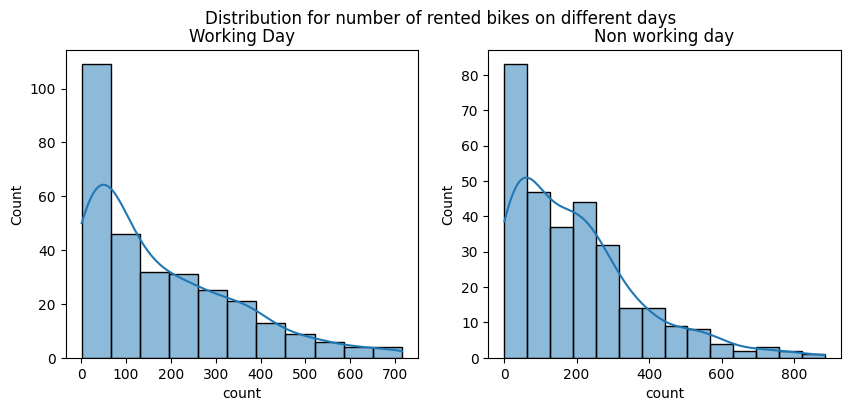

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(wrkday_sample,kde=True).set_title('Working Day')

plt.subplot(1,2,2)
sns.histplot(nwrkday_sample,kde=True).set_title('Non working day')

plt.suptitle('Distribution for number of rented bikes on different days')
plt.show()

CONCLSION:
- The counts of rented cycles on both working and non-working days do not follow a normal distribution.

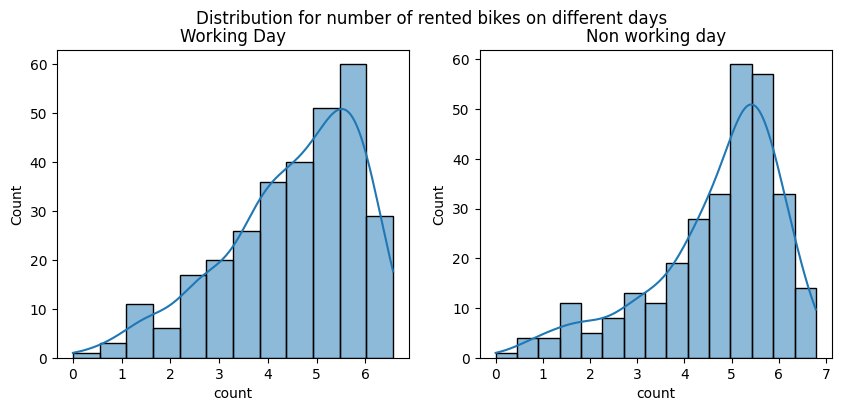

In [ ]:
# Converting sample distribution to normal by applying log transformation
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(np.log(wrkday_sample),kde=True).set_title('Working Day')

plt.subplot(1,2,2)
sns.histplot(np.log(nwrkday_sample),kde=True).set_title('Non working day')

plt.suptitle('Distribution for number of rented bikes on different days')
plt.show()

In [ ]:
# Lets Perform Wilk-Shapiro test for the Workingday sample

# H0 : The Working day samples are normally distributed
# Ha: The Working day samples are not normally distributed
alpha = 0.05
test_stat,p_value= shapiro(np.log(wrkday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("INTERPRETATION: Reject Ho,that is The working day samples are not normally distributed ")
else:
 print("INTERPRETATION: Fail to Reject Ho,that is The working day samples are normally distributed")

test stat : 0.9404006004333496
p value : 1.2190003451095777e-09
INTERPRETATION: Reject Ho,that is The working day samples are not normally distributed 


In [ ]:
# Lets Perform Wilk-Shapiro test for the Non Workingday sample

# H0 : The Non Working day samples are normally distributed
# Ha: The Non Working day samples are not normally distributed
alpha = 0.05
test_stat,p_value= shapiro(np.log(nwrkday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("INTERPRETATION: Reject Ho,that is The Non working day samples are not normally distributed ")
else:
 print("INTERPRETATION: Fail to Reject Ho,that is The Non working day samples are normally distributed")

test stat : 0.9050403237342834
p value : 8.387295849163201e-13
INTERPRETATION: Reject Ho,that is The Non working day samples are not normally distributed 


CONCLUSION:
- We have sufficient evidence to conclude that the non working day and the working day sample data does are not normal distributed.

**HOMOGENITY OF VARIANCE USING LEVENE'S TEST**

In [ ]:
# H0 : Variance is equal(both working day count and non working day count samples)
# Ha: Variances is not equal
alpha = 0.05

In [ ]:
stat, pvalue = levene(np.log(wrkday_sample), np.log(nwrkday_sample))
print("Stat :",stat)
print("P-value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("INTERPRETATION: Reject Ho that is Variance is not equal ")
else:
 print("INTERPRETATION: Fail to Reject Ho that is Variance is equal")

Stat : 0.9893978998201722
P-value : 8.387295849163201e-13
INTERPRETATION: Reject Ho that is Variance is not equal 


In [ ]:
# OR we can canculate manually
np.var(wrkday),np.var(nwrkday)

(30171.346098942427, 34040.69710674686)

In [ ]:
(np.var(nwrkday)/np.var(wrkday)) < (4/1)
# If the ratio of the larger data groups to the small data group is less than 4:1
#then we can consider that the given data groups have equal variance.

True

CONCLUSION:

This means that we do not have enough sufficient evidence to conclude that variance across workingday count and non workingday count is significantly different thus making the assumption of homogenity of variances true.

TTEST ASSUMPTION CONCLUSION:

- 3 out of 4 assumptions for T test has been satified.
- Although the sample distribution did not meet the criteria of passing the normality test, we proceed with the T-test as per the given instructions.

**2 SAMPLE TTEST**

In [ ]:
t_stat,p_value= ttest_ind((wrkday),(nwrkday),equal_var = True)
print("t stat :",t_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Working day does have an effect on number of cycles rented ")
else:
 print("Fail to Reject Ho: Working day does not have an effect on number of cycles rented")

t stat : -1.2096277376026694
p value : 0.22644804226361348
Fail to Reject Ho: Working day does not have an effect on number of cycles rented


**CONCLUSION:**

- Since the p-value of our test is greater than alpha which is 0.05, we fail to reject the null hypothesis of this test.
- we do not have sufficient evidence to conclude that working days have a significant effect on the number of cycles rented.
- This suggests that there is no significant difference in the number of cycles rented on working days versus non-working days.

## **ANNOVA to check if No. of cycles rented is similar or different in different**
1. weather
2. season

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


**No. of cycles rented is similar or different in weather**

In [ ]:
df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
sample_1= df[df['weather']==1]['count'].sample(500)
sample_2 = df[df['weather']==2]['count'].sample(500)
sample_3 = df[df['weather']==3]['count'].sample(500)
sample_4 = df[df['weather']==4]['count'].sample(1)

In [ ]:
w1 = df[df['weather']==1]['count'].values
w2 = df[df['weather']==2]['count'].values
w3 = df[df['weather']==3]['count'].values
w4 = df[df['weather']==4]['count'].values


**CHECK NORMALITY OF DATA USING HISTOGRAM**

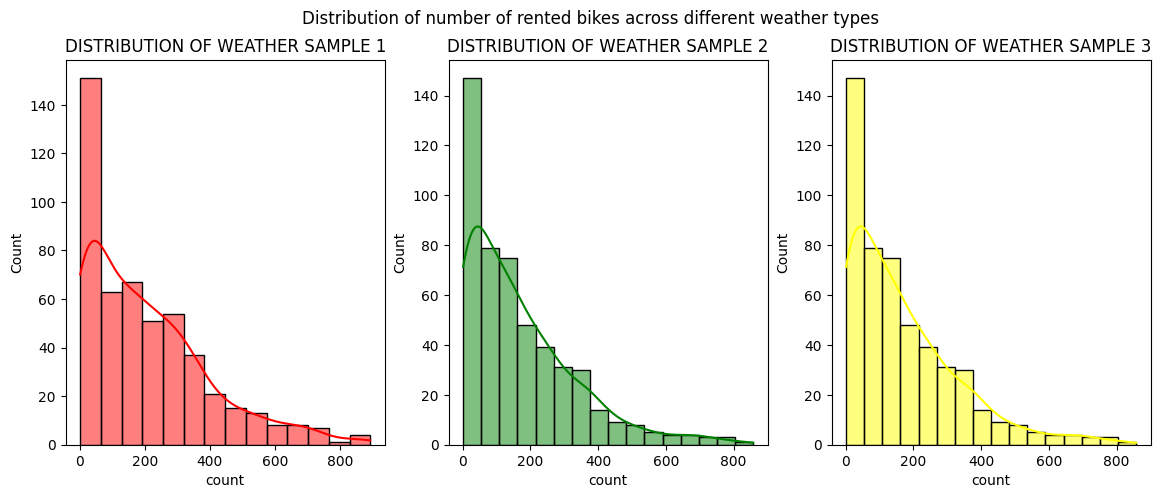

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
sns.histplot(sample_1,kde=True,color = 'red').set_title('DISTRIBUTION OF WEATHER SAMPLE 1')

plt.subplot(1,3,2)
sns.histplot(sample_2,kde=True,color = 'green').set_title('DISTRIBUTION OF WEATHER SAMPLE 2')

plt.subplot(1,3,3)
sns.histplot(sample_2,kde=True,color = 'yellow').set_title('DISTRIBUTION OF WEATHER SAMPLE 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

CONCLUSION:

- We can concude that none of the graphs of different weathers are normally distributed.
- Hence we apply log transformation to make these distributions near to normal

In [ ]:
# Converting sample distribution to normal by applying log transformation
log_1 = np.log(sample_1)
log_2 = np.log(sample_2)
log_3 = np.log(sample_3)
log_4 = np.log(sample_4)

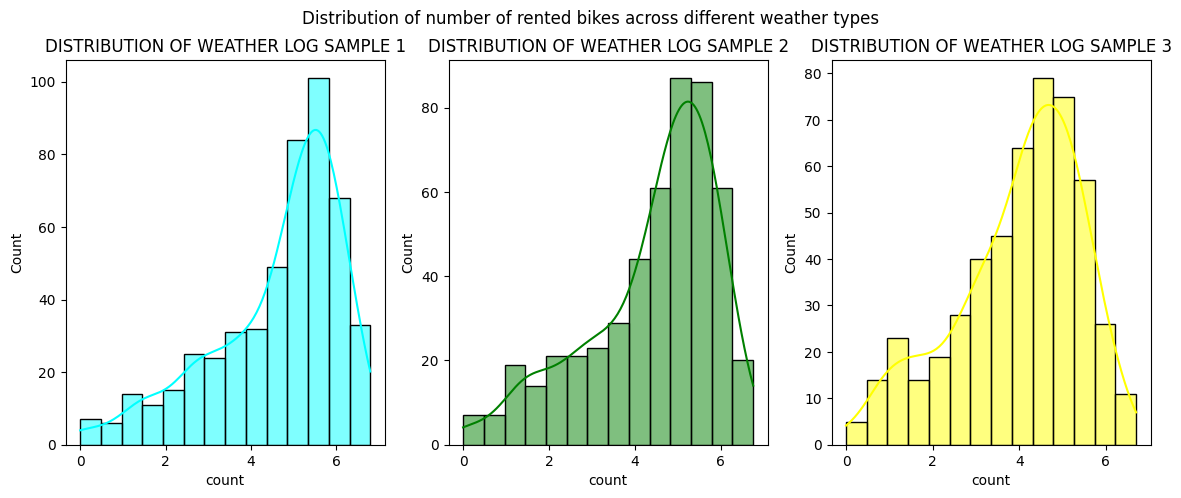

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
sns.histplot(log_1,kde=True,color = 'cyan').set_title('DISTRIBUTION OF WEATHER LOG SAMPLE 1')

plt.subplot(1,3,2)
sns.histplot(log_2,kde=True,color = 'green').set_title('DISTRIBUTION OF WEATHER LOG SAMPLE 2')

plt.subplot(1,3,3)
sns.histplot(log_3,kde=True,color = 'yellow').set_title('DISTRIBUTION OF WEATHER LOG SAMPLE 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

CONCLUSION:

After convering to the log we can observe that the data is now looks like normally distibuted.

**LETS PERFORM WILK - SHAPIRO TEST**

In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS FOR LOG SAMPLE 1
# H0: SAMPLE 1 FOLLOWS A NORMAL DISTRIBUTION
# H1: SAMPLE 1 DOES'T FOLLOWS NORMAL DISTRIBUTION

# Consider confidence level to be 95%
# alpha = 1 - confidence
alpha = 0.05
stat, pvalue = shapiro(log_1)
print('Test stats:',stat)
print('P_Value:',pvalue)
if p_value < alpha:
  print("INTERPRETATION: REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 1 DOES'T FOLLOWS NORMAL DISTRIBUTION.")
else:
  print("INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 1 DOES'T FOLLOWS NORMAL DISTRIBUTION.")

Test stats: 0.9022116661071777
P_Value: 2.2821815493025752e-17
INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 1 DOES'T FOLLOWS NORMAL DISTRIBUTION.


In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS FOR LOG SAMPLE 2
# H0: SAMPLE 1 FOLLOWS A NORMAL DISTRIBUTION
# H1: SAMPLE 1 DOES'T FOLLOWS NORMAL DISTRIBUTION

# Consider confidence level to be 95%
# alpha = 1 - confidence
alpha = 0.05
stat, pvalue = shapiro(log_2)
print('Test stats:',stat)
print('P_Value:',pvalue)
if p_value < alpha:
  print("INTERPRETATION: REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 2 DOES'T FOLLOWS NORMAL DISTRIBUTION.")
else:
  print("INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 2 DOES'T FOLLOWS NORMAL DISTRIBUTION.")

Test stats: 0.9158791303634644
P_Value: 4.659556830207876e-16
INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 2 DOES'T FOLLOWS NORMAL DISTRIBUTION.


In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS FOR LOG SAMPLE 3
# H0: SAMPLE 1 FOLLOWS A NORMAL DISTRIBUTION
# H1: SAMPLE 1 DOES'T FOLLOWS NORMAL DISTRIBUTION

# Consider confidence level to be 95%
# alpha = 1 - confidence
alpha = 0.05
stat, pvalue = shapiro(log_3)
print('Test stats:',stat)
print('P_Value:',pvalue)
if p_value < alpha:
  print("INTERPRETATION: REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 3 DOES'T FOLLOWS NORMAL DISTRIBUTION.")
else:
  print("INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 3 DOES'T FOLLOWS NORMAL DISTRIBUTION.")

Test stats: 0.9516167044639587
P_Value: 1.0005484288311273e-11
INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT SAMPLE 3 DOES'T FOLLOWS NORMAL DISTRIBUTION.


CONCLUSION:

None of the weather type samples adhere to a normal distribution even after applying the log-normal transformation, indicating that the normality assumption of the ANOVA test is not met.

**Homegenity of Variance Using Levene's Test**

In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS FOR LOG SAMPLE 3
# H0: VARIANCE ARE EQUAL FOR ALL THE GROUPS
# H1: VARIANCE ARE NOT EQUAL FOR ALL THE GROUPS

# Consider confidence level to be 95%
# alpha = 1 - confidence
alpha = 0.05
stat,pvalue= levene(log_1,log_2,log_3,center='median')
print('Test stats:',stat)
print('P_Value:',pvalue)
if p_value < alpha:
  print("INTERPRETATION: REJECT H0, SO WE CAN CONCLUDE THAT VARIANCE ARE NOT EQUAL FOR ALL THE GROUPS.")
else:
  print("INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT VARIANCE ARE EQUAL FOR ALL THE GROUPS.")

Test stats: 0.010209210373545195
P_Value: 0.9898427956356063
INTERPRETATION: FAIL TO REJECT H0, SO WE CAN CONCLUDE THAT VARIANCE ARE EQUAL FOR ALL THE GROUPS.


FINAL CONCLUSION:
Out of 3 assumption 2 were right so we can proceed to perform ANOVA TEST

In [ ]:
# LET SET UP OUR NULL AND ALTERNATE HYPOTHESIS FOR all different WEATHERS
# H0: Number of cycles rented is similar in different weather
# H1: Number of cycles rented is NOT similar in different weather
# Consider confidence level to be 95%
# alpha = 1 - confidence


In [ ]:
# ANOVA test for log normal distributed data points
f_stat,p_value= f_oneway(log_1,log_2, log_3,log_4)
print("test stat :",f_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is equal across different weather conditions")

test stat : 15.869504405681614
p value : 3.6810195191411714e-10
Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others 


CONCLUSION:

- Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
- Indeed, this indicates that we have collected sufficient evidence to conclude that there is a significant difference in the mean number of cycles rented across all weather conditions.
- Additionally, this suggests that weather conditions do have a notable effect on the number of cycles rented.

**ANOVA TEST FOR NUMBER OF CYCLES RENTED AND THE DIFFERENT SEASONS**

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
df['season'].value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64

In [ ]:
winter_sample =df[df['season']=='winter']['count'].sample(500)
fall_sample = df[df['season']=='fall']['count'].sample(500)
summer_sample = df[df['season']=='summer']['count'].sample(500)
spring_sample = df[df['season']=='spring']['count'].sample(500)

**CHECK FOR NORMALITY OF DATA POINTS USING QQPLOT OR HISTOGRAM**

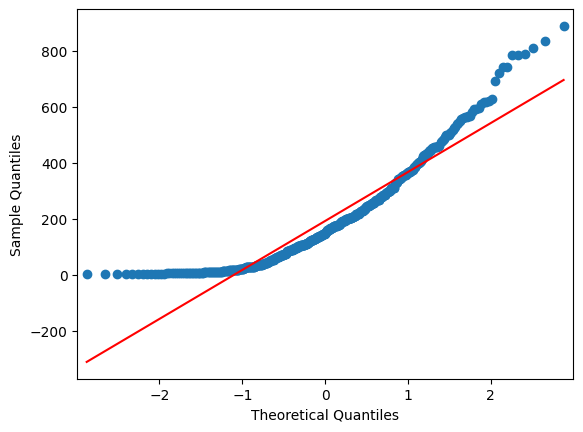

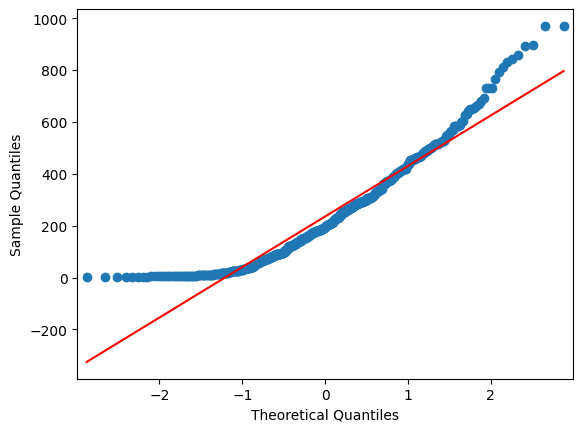

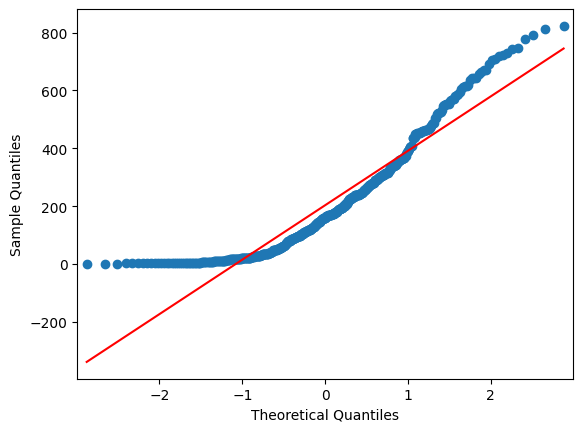

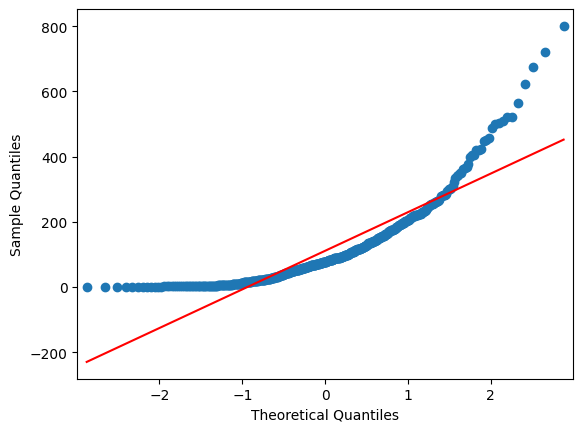

In [ ]:
# qqplot for all the different season to check the normality of the data points
qqplot(winter_sample,line ='s')
qqplot(fall_sample,line ='s')
qqplot(summer_sample,line ='s')
qqplot(spring_sample,line ='s')

plt.show()

**CONCLUSION:**

We observe that none of the graphs are normally distributed.
Hence We have to apply log transformation to make these distributions near to normal.


In [ ]:
# convert the sample distribution to the normal distributioin by using the log function
log_winter=np.log(winter_sample)
log_fall=np.log(fall_sample)
log_summer=np.log(summer_sample)
log_spring=np.log(spring_sample)

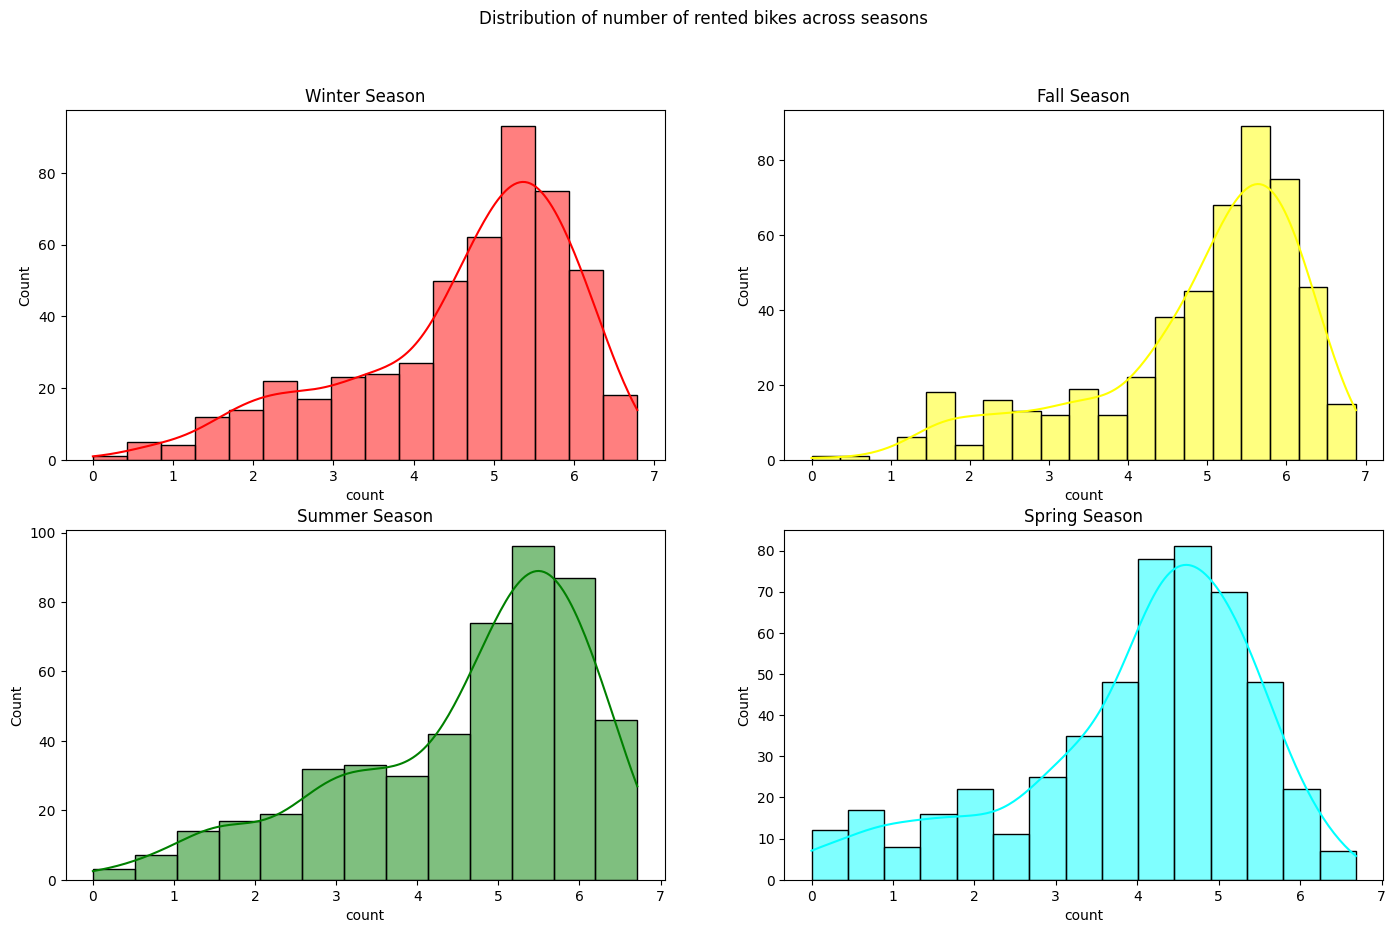

In [ ]:
# Now lets check the distribution using histogram
plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
sns.histplot(log_winter,kde=True,color='red').set_title('Winter Season')

plt.subplot(2,2,2)
sns.histplot(log_fall,kde=True,color='yellow').set_title('Fall Season')

plt.subplot(2,2,3)
sns.histplot(log_summer,kde=True,color='green').set_title('Summer Season')

plt.subplot(2,2,4)
sns.histplot(log_spring,kde=True,color='cyan').set_title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()

CONCLUDE:

After applying a log transformation to the samples of each season, it can be inferred that a significant improvement was observed in achieving data distributions that closely resemble normality for each of the seasons.

We will now conduct the Shapiro-Wilk Test to assess the normality of the log-normal distribution obtained in the previous step.

In [ ]:
# Let set the null and alternate hypothesis is as follows:

# H0: The sample follows a normal distribution
# Ha: The sample does not follow a normal distribution
alpha = 0.05
test_stat,p_value = shapiro(log_winter)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9191226959228516
p value : 1.0029003503180109e-15
Reject Ho: The sample does not follow a normal distribution


In [ ]:
test_stat,p_value= shapiro(log_fall)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8915716409683228
p value : 2.6741241667173007e-18
Reject Ho: The sample does not follow a normal distribution


In [ ]:
test_stat,p_value= shapiro(log_summer)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9131221175193787
p value : 2.468654231366609e-16
Reject Ho: The sample does not follow a normal distribution


In [ ]:
test_stat,p_value= shapiro(log_spring)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9227510690689087
p value : 2.426800851135116e-15
Reject Ho: The sample does not follow a normal distribution


CONCLUSION:

We can observe that all the even after applying the log transformation the distribution is not normally distributed for the seasons.

**Lets perform Homegenity of Variance test that is Levene's Test to check the variance of the different sample season**

In [ ]:
# Lets set up the null and alternate hypothesis is as follows:

# H0 : The variance is equal across all groups
# Ha : The variance is not equal across the groups
alpha = 0.05
test_stat,p_value= levene(log_winter,log_fall,log_summer,log_spring)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 2.199701014982017
p value : 0.0861849278305028
Fail to Reject Ho: Variance is equal across all groups


**ANOVA TEST**

In [ ]:
alpha = 0.05
# Lets set up our null and alternate hypothesis
#H0 :The mean number of cycles rented is the same across different seasons
#Ha: At least one season has a mean number of cycles rented that is significantly different from the others.

In [ ]:
spring = df[df['season']==1]['count'].values
summer = df[df['season']==2]['count'].values
fall = df[df['season']==3]['count'].values
winter= df[df['season']==4]['count'].values

In [ ]:
# Performing anova test on the log normally distributed data points of different season
f_stat,p_value= f_oneway(log_spring,log_summer,log_fall,log_winter)
print("f stat :",f_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others.")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is the same across different seasons ")

f stat : 35.893695393134216
p value : 1.3709168995044173e-22
Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others.


**CONCLUSIOIN:**

- Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
- Indeed, this implies that we have gathered enough evidence to conclude that there is a significant difference in the mean number of cycles rented across all seasons.

# INSIGHTS
* **Seasons:**
- The winter season records a rental rate of about 25.1% for cycles.
- The lowest rental rate, at just 24%, is observed in the spring season.
- In summer and fall seasons more bikes are rented as compared to other seasons.
- **Holiday and Workingday:**
- On working days, 68.6% of cycles are rented, whereas on non-working days, 31.4% of cycles are rented.
- Datetime:
-The highest average count of rental bikes is observed at 6 PM, closely followed by 7 PM and 8 AM. This indicates distinct peak hours during the day when cycling is most popular.
- The lowest average count of rental bikes occurs at 4 AM, with 3 AM and 5 AM also showing low counts. These hours represent the early morning period with the least demand for cycling.
- There is an increasing trend in cycle rentals between 5 AM and 8 AM, suggesting a surge in demand during the early morning hours as people start their day.
- **Weather:**
- In Weather condition 1 experiences the highest rental rate, with approximately 66.06% of cycles rented.
- In weather condition 2, around 26.03% of cycles are rented.
- In Weather condition 3 has a rental rate of approximately 7.89% for cycles.
- In Weather condition 4 had an exceptionally low rental rate, with only 0.00918% of cycles being rented.
- **Month Trend:**
- The highest average hourly count of rental bikes occurs in June, July, and August, reflecting the peak demand during summer.
- The lowest average hourly count of rental bikes is found in January, February, and March, which are the winter months with reduced cycling activity.
- There is an increasing trend in average bike rentals from February to June, corresponding to the shift from winter to spring and summer.
- A decreasing trend in average bike rentals is observed from October to December due to the onset of winter.

# RECOMMENDATIONS:

- In summer,fall,and winter seasons the company should have more bikes in stock. Because the demand in these seasons is higher as compared to other
seasons.
- When weather is 1 i.e Clear, Few clouds, partly cloudy, partly cloudy most of the bikes were rented.So for this weather we
have high sales and demand whcih need not to be compromised so we need to increase the stock so that i will be available for all the
customers.
- Whenever temperature is less than 10 or in very cold days, company should have less bikes.
- People love to cycle when the atemperate is between 20 to 35.
- In very low humidity days, company should have less bikes in the stock to be rented.

- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock as it is least to be rented.

- As we observe The lowest average count of rental bikes occurs from 1 am to 4 am.so we can capitalize this time for the cycle repair if needed,maintenance and the charging so to increase the operational efficiency
- After maintenance and charging, strategically deploy bikes to high-demand areas in preparation for the morning rush.
- Ensure that bikes are available at key locations, such as transportation hubs, offices, and residential areas.

- During the seasons with adverse weather conditions, such as rain or snow, Yulu can provide weather-ready bikes equipped with features like fenders and all-weather tires or anti skid tyres.
- This ensures that riders are comfortable and safe during inclement weather.
